In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm


In [3]:
table = pd.read_csv("student-por.csv",sep=";")
table

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [36]:
table['school_numeric'] = table['school'].apply(lambda x: 0 if x == 'MS' else 1 if x == 'GP' else None)
table['gender_numeric'] = table['sex'].apply(lambda x: 0 if x == 'M' else 1 if x == 'F' else None)
table['address_numeric'] = table['address'].apply(lambda x: 0 if x == 'U' else 1 if x == 'R' else None)
table['famsize_numeric'] = table['famsize'].apply(lambda x: 0 if x == 'GT3' else 1 if x == 'LE3' else None)
table['Pstatus_numeric'] = table['Pstatus'].apply(lambda x: 0 if x == 'A' else 1 if x == 'T' else None)
table['Mjob_numeric'] = table['Mjob'].apply(lambda x: 0 if x == 'at_home' else 1 if x == 'services' else 2 if x == 'teacher' else 3 if x == 'health' else 4 if x == 'other' else None)
table['Fjob_numeric'] = table['Fjob'].apply(lambda x: 0 if x == 'at_home' else 1 if x == 'services' else 2 if x == 'teacher' else 3 if x == 'health' else 4 if x == 'other' else None)
table['reason_numeric'] = table['reason'].apply(lambda x: 0 if x == 'course' else 1 if x == 'reputation' else 2 if x == 'other' else 3 if x == 'home' else None)
table['guardian_numeric'] = table['guardian'].apply(lambda x: 0 if x == 'mother' else 1 if x == 'father'else 2 if x == 'other' else None)
table['schoolsup_numeric'] = table['schoolsup'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['famsup_numeric'] = table['famsup'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['paid_numeric'] = table['paid'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['activities_numeric'] = table['activities'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['nursery_numeric'] = table['nursery'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['higher_numeric'] = table['higher'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['internet_numeric'] = table['internet'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['romantic_numeric'] = table['romantic'].apply(lambda x: 0 if x == 'yes' else 1 if x == 'no' else None)
table['Medu_string'] = table['Medu'].apply(lambda x: 'none' if x == 0 else 'primary education (4th grade)' if x == 1 else '5th to 9th grade' if x == 2 else 'secondary education' if x == 3 else 'higher education' if x == 4 else None)
table['Fedu_string'] = table['Fedu'].apply(lambda x: 'none' if x == 0 else 'primary education (4th grade)' if x == 1 else '5th to 9th grade' if x == 2 else 'secondary education' if x == 3 else 'higher education' if x == 4 else None)


table


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric,Medu_string,Fedu_string
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,1,1,1,0,0,1,1,higher education,higher education
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,1,1,1,0,0,1,primary education (4th grade),primary education (4th grade)
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,0,1,1,1,0,0,0,1,primary education (4th grade),primary education (4th grade)
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,0,1,0,0,0,0,0,higher education,5th to 9th grade
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,1,1,0,0,1,1,secondary education,secondary education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,1,1,1,0,1,0,0,1,5th to 9th grade,secondary education
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,0,1,1,0,0,0,1,secondary education,primary education (4th grade)
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,0,0,0,1,1,primary education (4th grade),primary education (4th grade)
647,MS,M,17,U,LE3,T,3,1,services,services,...,1,1,1,1,1,0,0,1,secondary education,primary education (4th grade)


In [5]:
x = table.drop(columns=['romantic','internet','higher','nursery','activities','paid','famsup','schoolsup','guardian','reason','Mjob','Fjob','Pstatus','famsize','address','sex','school','G3'])
x.to_csv('x.csv')
x


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_numeric,guardian_numeric,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,1,1,0,0,1,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,0,1,1,1,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,2,0,0,1,1,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,3,0,1,0,1,0,0,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,3,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,0,1,1,1,0,1,0,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,1,0,0,0,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
647,17,3,1,2,1,0,2,4,5,3,...,0,0,1,1,1,1,1,0,0,1


In [6]:
x

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_numeric,guardian_numeric,schoolsup_numeric,famsup_numeric,paid_numeric,activities_numeric,nursery_numeric,higher_numeric,internet_numeric,romantic_numeric
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,1,1,1,0,0,1,1
1,17,1,1,1,2,0,5,3,3,1,...,0,1,1,0,1,1,1,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,2,0,0,1,1,1,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,3,0,1,0,1,0,0,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,3,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,0,1,1,1,0,1,0,0,1
645,18,3,1,1,2,0,4,3,4,1,...,0,0,1,0,1,1,0,0,0,1
646,18,1,1,2,2,0,1,1,1,1,...,0,0,1,1,1,0,0,0,1,1
647,17,3,1,2,1,0,2,4,5,3,...,0,0,1,1,1,1,1,0,0,1


In [7]:
y= table['G3']
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [8]:
x = sm.add_constant(x)


In [9]:
model = sm.OLS(y, x)
model

In [10]:
results = model.fit()
results

In [11]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     115.5
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.20e-236
Time:                        19:13:06   Log-Likelihood:                -1050.0
No. Observations:                 649   AIC:                             2166.
Df Residuals:                     616   BIC:                             2314.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0769      0

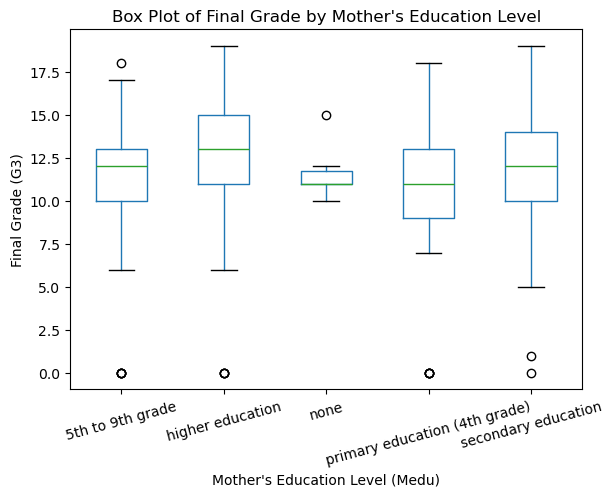

In [41]:
df = pd.DataFrame(table)

# Scatter plot
df.boxplot(column='G3', by='Medu_string', grid=False,rot=15)

# Add titles and labels
plt.title('Box Plot of Final Grade by Mother\'s Education Level')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Mother\'s Education Level (Medu)')
plt.ylabel('Final Grade (G3)')

# Show the plot
plt.show()


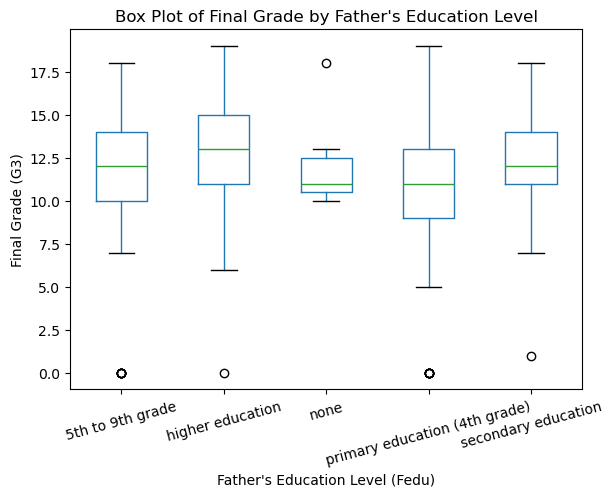

In [42]:
df = pd.DataFrame(table)

# Scatter plot
df.boxplot(column='G3', by='Fedu_string', grid=False,rot=15)

# Add titles and labels
plt.title('Box Plot of Final Grade by Father\'s Education Level')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Father\'s Education Level (Fedu)')
plt.ylabel('Final Grade (G3)')

# Show the plot
plt.show()

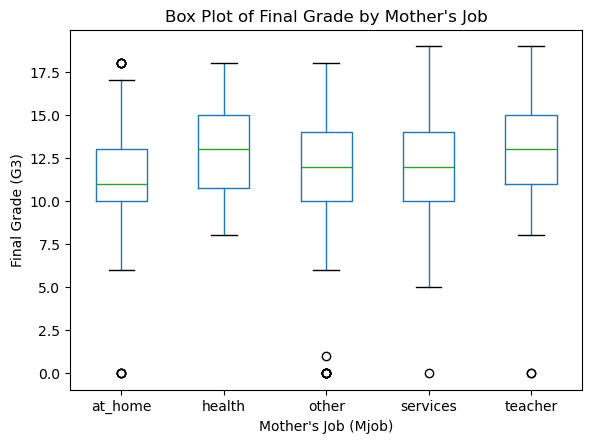

In [24]:
df = pd.DataFrame(table)

# Scatter plot
df.boxplot(column='G3', by='Mjob', grid=False)

# Add titles and labels
plt.title('Box Plot of Final Grade by Mother\'s Job')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Mother\'s Job (Mjob)')
plt.ylabel('Final Grade (G3)')

# Show the plot
plt.show()

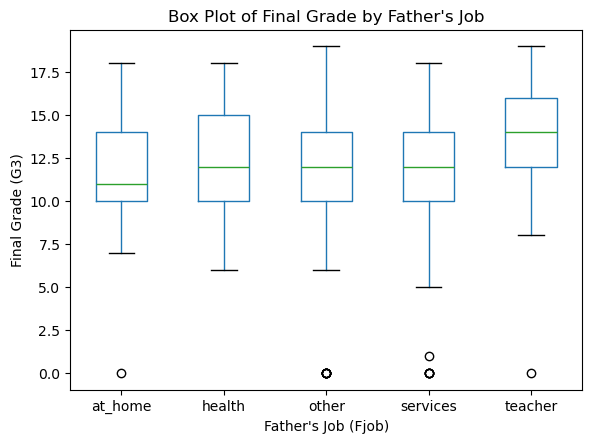

In [25]:
df = pd.DataFrame(table)

# Scatter plot
df.boxplot(column='G3', by='Fjob', grid=False)

# Add titles and labels
plt.title('Box Plot of Final Grade by Father\'s Job')
plt.suptitle('')  # Remove the automatic suptitle
plt.xlabel('Father\'s Job (Fjob)')
plt.ylabel('Final Grade (G3)')

# Show the plot
plt.show()